### Deep Learning approaches to build a predictive model

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



/Users/gangalingden/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [898]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [899]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [900]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


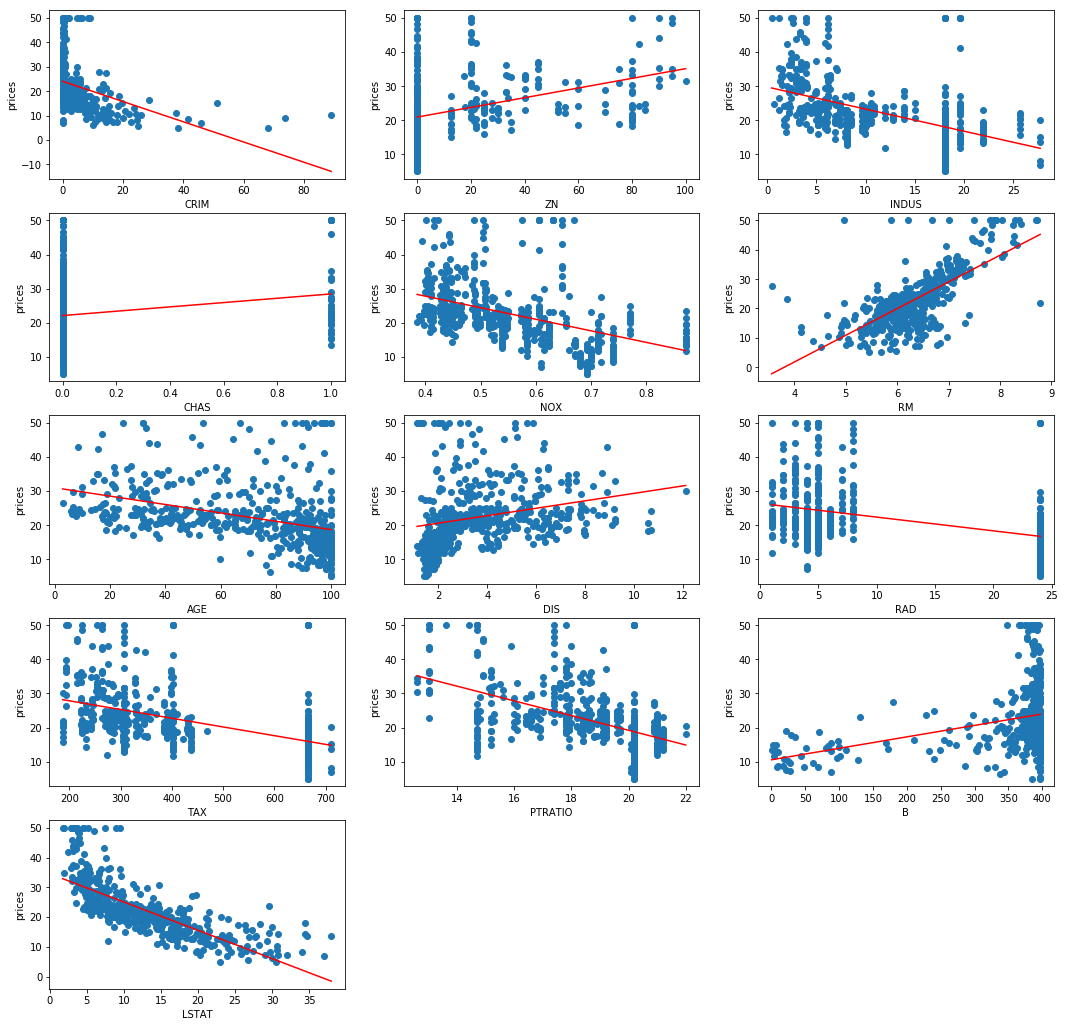

In [901]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    
   
    
    

In [902]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [903]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [904]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [689]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 150)               2100      
_________________________________________________________________
dense_317 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_318 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_319 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_320 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_321 (Dense)            (None, 1)                 151       
Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0
_________________________________________________________________


In [690]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Train on 323 samples, validate on 81 samples
Epoch 1/300
323/323 [==============================] - 8s 23ms/step - loss: 598.3431 - mean_absolute_error: 22.5095 - val_loss: 480.4472 - val_mean_absolute_error: 20.2859
Epoch 2/300
323/323 [==============================] - 0s 464us/step - loss: 393.8183 - mean_absolute_error: 17.2987 - val_loss: 89.6488 - val_mean_absolute_error: 6.4877
Epoch 3/300
323/323 [==============================] - 0s 473us/step - loss: 127.4023 - mean_absolute_error: 9.3184 - val_loss: 61.3814 - val_mean_absolute_error: 5.6134
Epoch 4/300
323/323 [==============================] - 0s 519us/step - loss: 83.7834 - mean_absolute_error: 6.2351 - val_loss: 60.1824 - val_mean_absolute_error: 5.0162
Epoch 5/300
323/323 [==============================] - 0s 459us/step - loss: 74.5199 - mean_absolute_error: 6.2339 - val_loss: 59.5460 - val_mean_absolute_error: 5.8249
Epoch 6/300
323/323 [==============================] - 0s 465us/step - loss: 71.0907 - mean_absolute_err

Epoch 49/300
323/323 [==============================] - 0s 651us/step - loss: 54.3352 - mean_absolute_error: 5.0011 - val_loss: 50.6653 - val_mean_absolute_error: 5.1419
Epoch 50/300
323/323 [==============================] - 0s 502us/step - loss: 52.4426 - mean_absolute_error: 5.1520 - val_loss: 48.1862 - val_mean_absolute_error: 4.7738
Epoch 51/300
323/323 [==============================] - 0s 627us/step - loss: 51.8490 - mean_absolute_error: 5.1046 - val_loss: 47.0889 - val_mean_absolute_error: 4.6211
Epoch 52/300
323/323 [==============================] - 0s 638us/step - loss: 50.7996 - mean_absolute_error: 5.1295 - val_loss: 48.6481 - val_mean_absolute_error: 4.4411
Epoch 53/300
323/323 [==============================] - 0s 620us/step - loss: 52.0058 - mean_absolute_error: 4.8466 - val_loss: 47.1465 - val_mean_absolute_error: 4.7506
Epoch 54/300
323/323 [==============================] - 0s 659us/step - loss: 50.5755 - mean_absolute_error: 4.7621 - val_loss: 55.4162 - val_mean_abs

323/323 [==============================] - 0s 622us/step - loss: 20.2387 - mean_absolute_error: 3.2359 - val_loss: 24.4703 - val_mean_absolute_error: 3.3075
Epoch 146/300
323/323 [==============================] - 0s 590us/step - loss: 20.6854 - mean_absolute_error: 3.4236 - val_loss: 18.9732 - val_mean_absolute_error: 2.8340
Epoch 147/300
323/323 [==============================] - 0s 447us/step - loss: 21.1540 - mean_absolute_error: 3.3399 - val_loss: 30.3674 - val_mean_absolute_error: 3.7411
Epoch 148/300
323/323 [==============================] - 0s 585us/step - loss: 26.1566 - mean_absolute_error: 3.7330 - val_loss: 26.0125 - val_mean_absolute_error: 3.2010
Epoch 149/300
323/323 [==============================] - 0s 579us/step - loss: 19.1924 - mean_absolute_error: 3.1922 - val_loss: 20.0197 - val_mean_absolute_error: 3.0454
Epoch 150/300
323/323 [==============================] - 0s 680us/step - loss: 18.9605 - mean_absolute_error: 3.1551 - val_loss: 26.0110 - val_mean_absolute_er

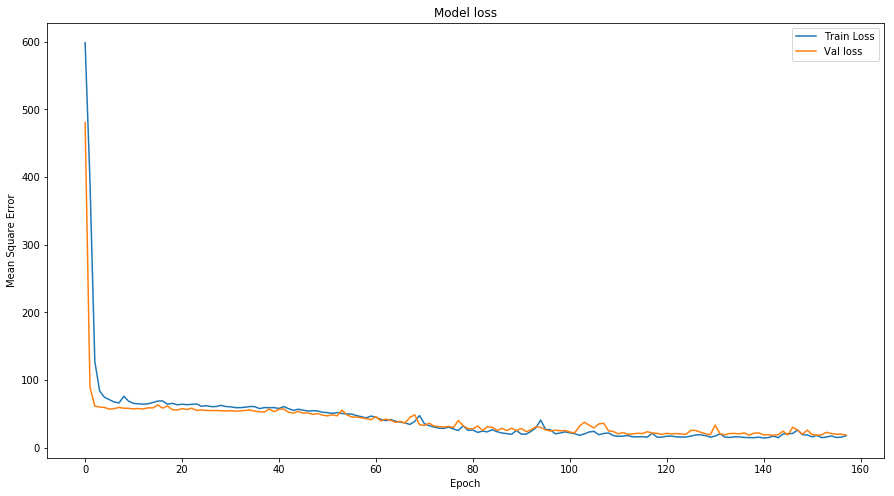

In [691]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [695]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



102/102 [==============================] - 0s 190us/step
loss value:  16.24074539483762
Mean absolute error:  2.63373737709195


In [757]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


[25.590422  37.48625   17.000551  25.128817  16.607439  19.340845
 18.559471  15.650881  20.977253  19.326307  19.98703   18.825693
  7.963045  19.30431   20.878283  21.842907  20.425995  10.342217
 42.59475   15.513068  26.198084  25.837694  16.401852  22.17246
 17.672476  15.174794  21.648037  13.920175  19.735518  19.255856
 21.002058  23.976297  18.756481  24.323591  13.738233  14.774037
 32.396496  23.303461  20.088331  22.647577  16.961424  32.42199
 46.141693  19.655474  24.222631  16.615934  17.266104  23.568766
 17.146776  33.11348   20.551208  36.927723  18.336277  24.31582
 45.866516  22.391039  17.662512  35.135452  23.100254  17.779528
 21.89772   31.920958  36.220825  17.020712  23.7465    18.046824
 16.703196  24.537752  31.364645  13.754661  21.278679  27.217371
 11.388164  22.438303  20.772512  10.475509  20.167238  43.128677
 13.133572  13.203116  21.949951  10.975419  21.89226   11.641559
 21.72124   25.111378  16.917246  25.202017  25.50582   18.634295
 22.83381    

In [806]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,25.590422
1,32.4,37.486252
2,13.6,17.000551
3,22.8,25.128817
4,16.1,16.607439
5,20.0,19.340845
6,17.8,18.559471
7,14.0,15.650881
8,19.6,20.977253
9,16.8,19.326307


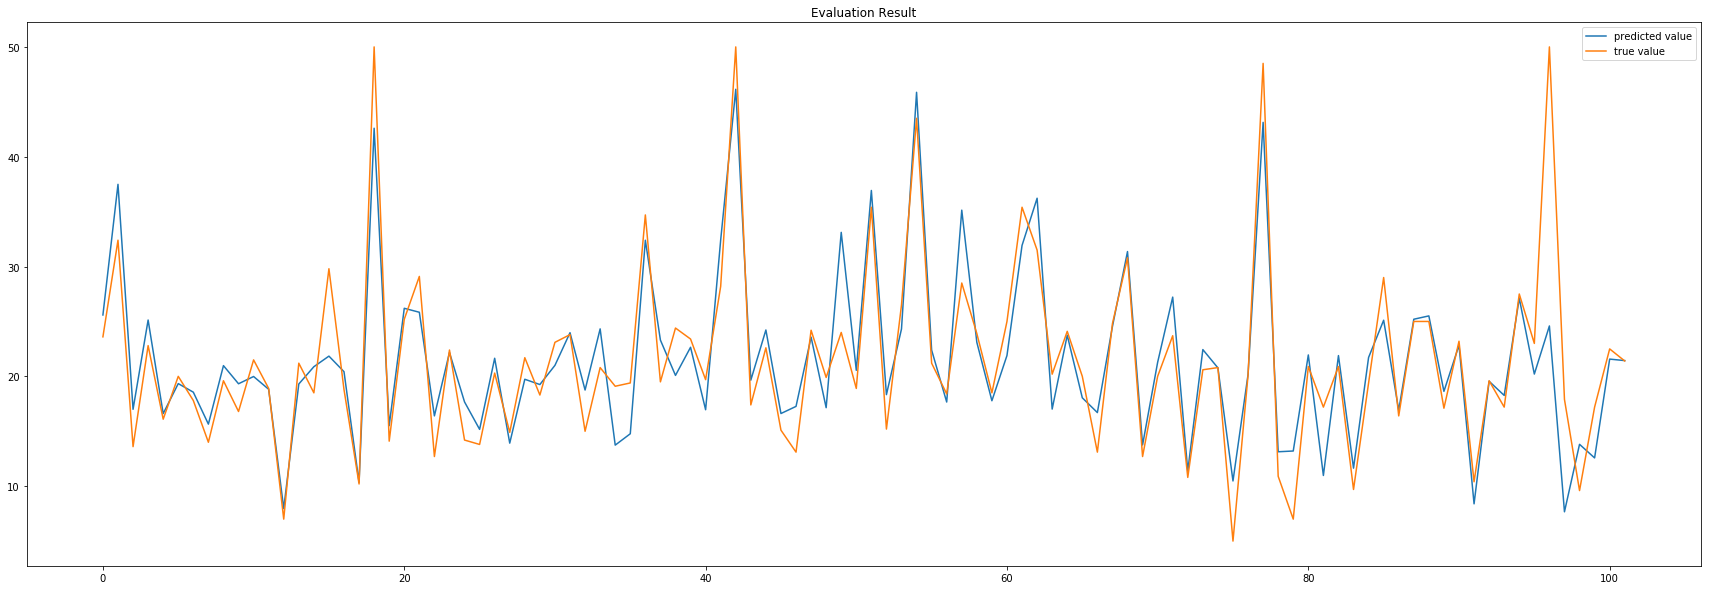

In [809]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

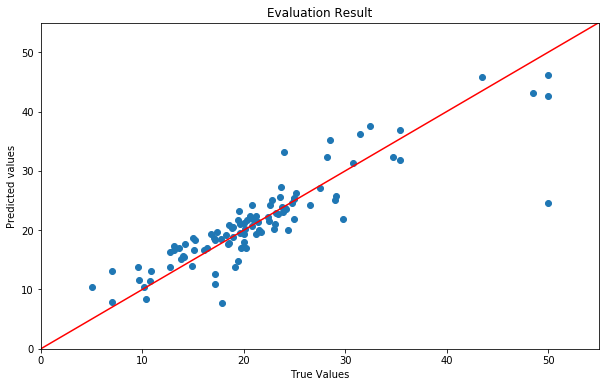

In [826]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

         ======= Remove outliers from the data set ========
  Tried to see the model perfomance after removing the outliers, the perfomance doesn't 
  show much improvemnt. This might be less data size after remoing the outliers.


In [905]:
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

In [906]:
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [907]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [908]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [909]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [910]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (214, 13)
testing data shape:  (54, 13)


In [914]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 150)               2100      
_________________________________________________________________
dense_356 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_357 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_358 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_359 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_360 (Dense)            (None, 1)                 151       
Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0
_________________________________________________________________


In [915]:

#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Train on 171 samples, validate on 43 samples
Epoch 1/300
171/171 [==============================] - 10s 57ms/step - loss: 485.8513 - mean_absolute_error: 21.4565 - val_loss: 434.8489 - val_mean_absolute_error: 20.4979
Epoch 2/300
171/171 [==============================] - 0s 635us/step - loss: 457.4068 - mean_absolute_error: 20.7782 - val_loss: 379.3888 - val_mean_absolute_error: 19.0971
Epoch 3/300
171/171 [==============================] - 0s 596us/step - loss: 369.2564 - mean_absolute_error: 18.5282 - val_loss: 229.3178 - val_mean_absolute_error: 14.6483
Epoch 4/300
171/171 [==============================] - 0s 634us/step - loss: 168.7987 - mean_absolute_error: 11.6760 - val_loss: 17.2939 - val_mean_absolute_error: 3.1044
Epoch 5/300
171/171 [==============================] - 0s 636us/step - loss: 61.6155 - mean_absolute_error: 6.6113 - val_loss: 71.8958 - val_mean_absolute_error: 7.7419
Epoch 6/300
171/171 [==============================] - 0s 610us/step - loss: 47.8748 - mean_abso

In [916]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



54/54 [==============================] - 0s 235us/step
loss value:  15.922834820217556
Mean absolute error:  2.903298015947695


In [918]:

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


[18.709263 24.179756 21.231794 18.435421 18.776245 23.072487 17.167145
 22.763042 22.791042 23.87087  18.341373 22.413925 23.46059  21.999714
 21.186483 23.117607 22.900814 23.213331 20.809013 18.835995 19.954365
 21.541697 19.941307 22.95221  23.379967 23.682293 20.848503 24.778103
 23.419899 19.07947  24.877907 23.532867 22.197716 17.287327 21.742983
 20.573864 18.542067 21.40238  24.69552  18.346947 20.827618 19.10169
 21.3207   17.233566 22.04654  20.005966 22.29559  22.386326 20.634472
 22.941322 17.13425  17.214645 23.408298 17.418644]


In [919]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,18.709263
1,18.7,24.179756
2,14.5,21.231794
3,19.1,18.435421
4,18.1,18.776245
5,23.3,23.072487
6,17.7,17.167145
7,23.2,22.763042
8,18.9,22.791042
9,28.0,23.870871


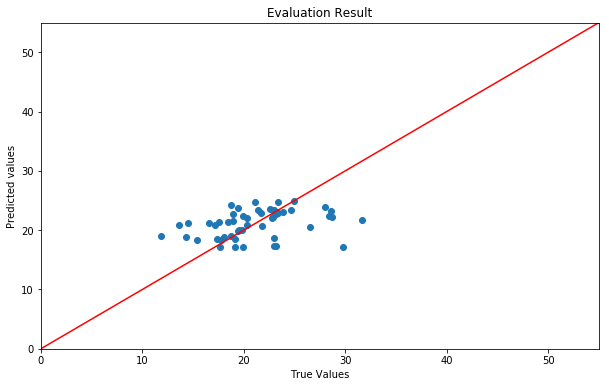

In [920]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()